<a href="https://colab.research.google.com/github/Samruddhi1907/Mental_Health_In_Tech_Analysis/blob/main/Mental_Health_in_Tech_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mental Health in Tech Survey



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on conducting an **Exploratory Data Analysis (EDA)** of the 2014 "Mental Health in Tech Survey" dataset. The primary goal is to uncover significant patterns and insights related to mental health attitudes, experiences, and workplace support within the tech industry.

The analysis will delve into various aspects captured in the survey, including **demographics (Age, Gender, Country), individual mental health factors (e.g., family history, seeking treatment), and workplace dynamics (e.g., company size, remote work, employer's role in providing mental health benefits and resources).**

Will apply various analytical techniques to generate a series of logical and meaningful charts. Each chart will highlight specific findings, aiming to provide actionable insights into the mental health landscape in tech and their potential business impact.

# **Problem Statement**


To thoroughly analyze the 2014 "Mental Health in Tech Survey" dataset  to understand the prevalence of mental health conditions, attitudes towards mental health, and the effectiveness of workplace support systems within the tech industry, ultimately identifying key factors influencing these aspects and proposing actionable insights for fostering a more supportive environment.

#### **Define Your Business Objective?**

The business objective of this analysis is to leverage insights from the 2014 "Mental Health in Tech Survey" to inform strategic decisions for tech organizations and HR departments. By identifying key drivers of mental health challenges and evaluating the effectiveness of existing support mechanisms, the project aims to develop data-backed recommendations. These recommendations will focus on enhancing employee well-being, fostering a more inclusive and supportive workplace culture, reducing the stigma associated with mental health, and ultimately contributing to improved productivity, employee retention, and a positive employer brand within the competitive tech landscape.

# ***1. Knowing the Data***

## Import Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Setting display options for better viewing of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Dataset Loading

In [ ]:
# Loading Dataset
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
    file_path = '/content/drive/My Drive/survey.csv'
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found on Google Drive. Please check the file path and ensure the file exists.")
    exit()
except Exception as e:
    print(f"An error occurred during Google Drive mounting or file loading: {e}")
    exit()

Mounted at /content/drive
Google Drive mounted successfully.
Dataset '/content/drive/My Drive/survey.csv' loaded successfully.


## Dataset First View

In [ ]:
# Dataset First Look
print("First 5 rows of the DataFrame (df.head()):")
print(df.head())
print("\nLast 5 rows of the DataFrame (df.tail()):")
print(df.tail())

First 5 rows of the DataFrame (df.head()):
             Timestamp  Age  Gender         Country state self_employed family_history treatment work_interfere    no_employees remote_work tech_company    benefits care_options wellness_program   seek_help   anonymity               leave mental_health_consequence phys_health_consequence     coworkers supervisor mental_health_interview phys_health_interview mental_vs_physical obs_consequence comments
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN             No       Yes          Often            6-25          No          Yes         Yes     Not sure               No         Yes         Yes       Somewhat easy                        No                      No  Some of them        Yes                      No                 Maybe                Yes              No      NaN
1  2014-08-27 11:29:37   44       M   United States    IN           NaN             No        No         Rarely  More than 1000          No          

## Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1259
Number of columns: 27


## Dataset Information

In [ ]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Count of missing values per column:")
print(missing_values)
print("\nPercentage of missing values per column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))

Count of missing values per column:
comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

Percentage of missing values per

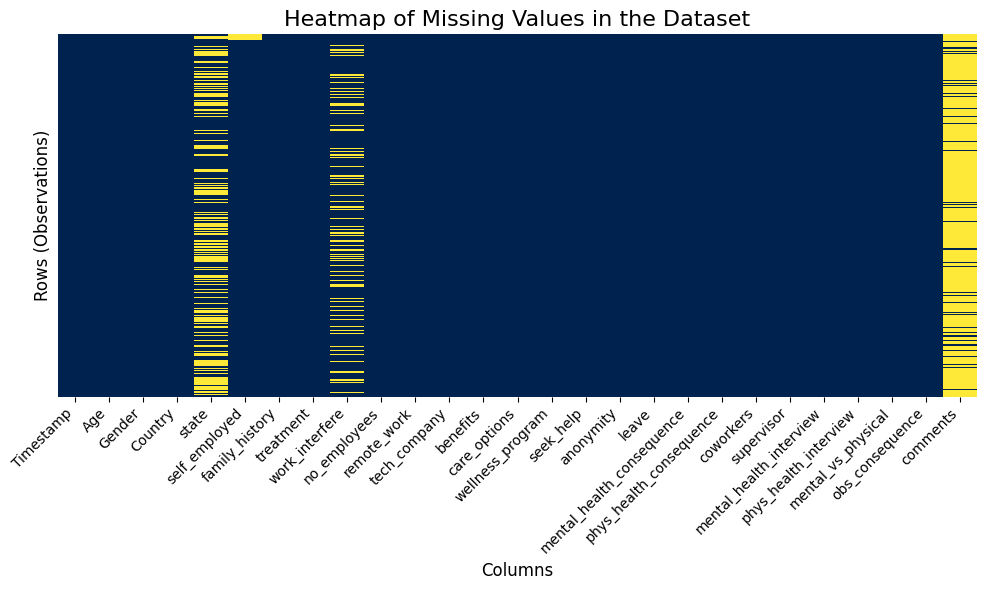

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows (Observations)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

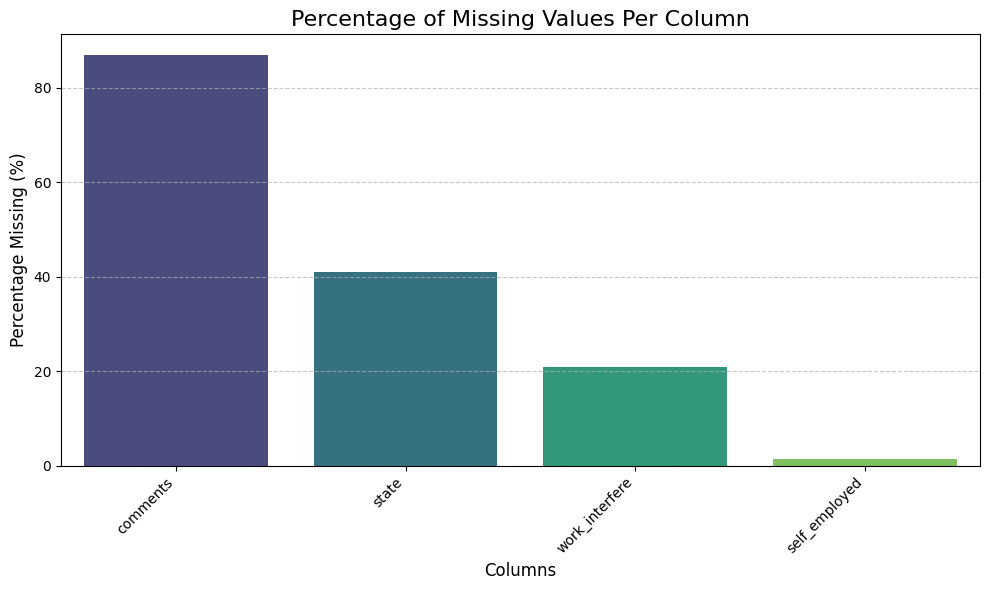

In [ ]:
# Additional visualization of missing value percentage (%)
missing_data_to_plot = df.isnull().sum()
missing_data_to_plot = missing_data_to_plot[missing_data_to_plot > 0] # Keeping only columns with missing values
missing_data_to_plot = (missing_data_to_plot / len(df)) * 100 # Converting to percentage
missing_data_to_plot = missing_data_to_plot.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_to_plot.index, y=missing_data_to_plot.values, palette='viridis',hue=missing_data_to_plot.index)
plt.title('Percentage of Missing Values Per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage Missing (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## What did you know about your dataset?

Based on the initial "Knowing the Data" phase of the project, here's what I've learned about the dataset:

**Dataset Overview**

The dataset, survey.csv, is from a 2014 survey focused on mental health in the tech workplace.

**Key Characteristics:**

* **Size:** It contains **1259 rows (observations)** and **27 columns (features).**
* **Data Types:**

One column (Age) is of integer type (int64).

All other **26 columns are of object type**, which primarily indicates they contain strings or mixed data, requiring further processing for numerical or categorical analysis. The 'Timestamp' column, although an object type, would need conversion to datetime for time-series analysis.

* **Duplicate Values:** No exact duplicate rows were found in the dataset, which ensures each survey response is unique.
* **Missing/Null Values:**

**'comments':** Has the highest percentage of missing values, nearly **87%.** This suggests it was an optional text field largely left blank.

**'state':** About **41%** of values are missing. This is expected as this column is only applicable to respondents from the United States.

**'work_interfere':** Approximately **21%** of values are missing. Given it's a conditional question ("If you have a mental health condition..."), these missing values likely indicate respondents who do not have a mental health condition.

**'self_employed':** A small percentage of about 1.4% is missing.

All other columns are complete with **no missing values**, indicating high data quality for the majority of the survey responses.

**Initial Observations:**

- The Timestamp column appears to be in a consistent datetime format, which will be useful for any time-based analysis.
- The Gender column seems to have various representations (e.g., 'Female', 'M', 'Male', 'f'), indicating a need for standardization during data cleaning.
- Age values appear to be numerical, but their range will need to be checked for outliers.
- Categorical columns like no_employees, benefits, treatment, family_history, etc., seem to have consistent string values, but unique value counts will be important for understanding their distributions.

This initial understanding of the dataset's structure and data quality issues forms the basis for subsequent data cleaning and exploratory data analysis.

# ***2. Understanding Variables***

In [ ]:
# Dataset Columns
print("Column names in the dataset:")
for col in df.columns:
    print(f"- {col}")

Column names in the dataset:
- Timestamp
- Age
- Gender
- Country
- state
- self_employed
- family_history
- treatment
- work_interfere
- no_employees
- remote_work
- tech_company
- benefits
- care_options
- wellness_program
- seek_help
- anonymity
- leave
- mental_health_consequence
- phys_health_consequence
- coworkers
- supervisor
- mental_health_interview
- phys_health_interview
- mental_vs_physical
- obs_consequence
- comments


In [ ]:
# Dataset Describe
print("\nDescriptive statistics for Numerical Columns:")
print(df.describe())
print("\nDescriptive statistics for Categorical/Object Columns:")
print(df.describe(include='object')) # Includes only object (categorical/string) columns


Descriptive statistics for Numerical Columns:
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

Descriptive statistics for Categorical/Object Columns:
                  Timestamp Gender        Country state self_employed family_history treatment work_interfere no_employees remote_work tech_company benefits care_options wellness_program seek_help   anonymity       leave mental_health_consequence phys_health_consequence     coworkers supervisor mental_health_interview phys_health_interview mental_vs_physical obs_consequence                         comments
count                  1259   1259           1259   744          1241           1259      1259            995         1259        1259         1259     1259         1259             1259      1259        1259        1259                      1259                    1259          1259       1259            

### Variables Description

- **Timestamp**: Date and time the survey response was recorded.
- **Age**: Age of the surveyed person.
- **Gender**: Self-reported gender identity of the surveyed person.
- **Country**: Country of residence of the respondent.
- **state**: State or territory of residence, specifically for US respondents. (Null for non-US).
- **self_employed**: Indicates if the person is self-employed (Yes/No).
- **family_history**: Does the respondent have a family history of mental illness? (Yes/No).
- **treatment**: Has the respondent sought treatment for a mental health condition? (Yes/No).
- **work_interfere**: If the respondent has a mental health condition, do they feel it interferes with their work? (Often, Rarely, Never, Sometimes, NaN if no condition).
- **no_employees**: Employee count of the respondent's company or organization (Categorical ranges like '6-25', 'More than 1000').
- **remote_work**: Does the respondent work remotely (outside of an office) at least 50% of the time? (Yes/No).
- **tech_company**: Is the respondent's employer primarily a tech company/organization? (Yes/No).
- **benefits**: Does the employer provide mental health benefits? (Yes/No/Don't know).
- **care_options**: Does the respondent know the options for mental health care their employer provides? (Yes/No/Not sure).
- **wellness_program**: Has the employer ever discussed mental health as part of an employee wellness program? (Yes/No/Don't know).
- **seek_help**: Does the employer provide resources to learn more about mental health issues and how to seek help? (Yes/No/Don't know).
- **anonymity**: Is the respondent's anonymity protected if they choose to take advantage of mental health or substance abuse treatment resources? (Yes/No/Don't know).
- **leave**: How easy is it for the respondent to take medical leave for a mental health condition? (Categorical).
- **mental_health_consequence**: Does the respondent think that discussing a mental health issue with their employer would have negative consequences? (Yes/No/Maybe).
- **phys_health_consequence**: Does the respondent think that discussing a physical health issue with their employer would have negative consequences? (Yes/No/Maybe).
- **coworkers**: Would the respondent be willing to discuss a mental health issue with their coworkers? (Yes/No/Some of them).
- **supervisor**: Would the respondent be willing to discuss a mental health issue with their direct supervisor(s)? (Yes/No/Some of them).
- **mental_health_interview**: Would the respondent bring up a mental health issue with a potential employer in an interview? (Yes/No/Maybe).
- **phys_health_interview**: Would the respondent bring up a physical health issue with a potential employer in an interview? (Yes/No/Maybe).
- **mental_vs_physical**: Does the respondent feel that their employer takes mental health as seriously as physical health? (Yes/No/Don't know).
- **obs_consequence**: Has the respondent heard of or observed negative consequences for coworkers with mental health conditions in their workplace? (Yes/No).
- **comments**: Any additional notes or open-ended comments provided by the respondent.

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
for column in df.columns:
    print(f"\nColumn: '{column}'")
    print(f"Number of unique values: {df[column].nunique()}")
    # For columns with many unique values (e.g., Timestamp, or free text 'comments'),
    # printing all unique values might be too verbose. Limiting for practical output.
    if df[column].nunique() > 50: # Arbitrary threshold for displaying unique values
        print(f"  Unique values (first 50, if many): {df[column].unique()[:50]}")
    else:
        print(f"  Unique values: {df[column].unique()}")


Column: 'Timestamp'
Number of unique values: 1246
  Unique values (first 50, if many): ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44'
 '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22'
 '2014-08-27 11:31:50' '2014-08-27 11:32:05' '2014-08-27 11:32:39'
 '2014-08-27 11:32:43' '2014-08-27 11:32:44' '2014-08-27 11:32:49'
 '2014-08-27 11:33:23' '2014-08-27 11:33:26' '2014-08-27 11:33:57'
 '2014-08-27 11:34:00' '2014-08-27 11:34:20' '2014-08-27 11:34:37'
 '2014-08-27 11:34:53' '2014-08-27 11:35:08' '2014-08-27 11:35:12'
 '2014-08-27 11:35:24' '2014-08-27 11:35:48' '2014-08-27 11:36:24'
 '2014-08-27 11:36:48' '2014-08-27 11:37:08' '2014-08-27 11:37:23'
 '2014-08-27 11:37:59' '2014-08-27 11:38:12' '2014-08-27 11:38:18'
 '2014-08-27 11:39:03' '2014-08-27 11:38:55' '2014-08-27 11:39:31'
 '2014-08-27 11:39:36' '2014-08-27 11:40:51' '2014-08-27 11:41:17'
 '2014-08-27 11:41:37' '2014-08-27 11:41:50' '2014-08-27 11:42:08'
 '2014-08-27 11:42:15' '2014-08-27 11:42:

# 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Standardizing 'Gender' column
# Creating a mapping for various gender representations to a consistent set.
gender_mapping = {
    'Male': 'Male', 'M': 'Male', 'male': 'Male', 'Male-ish': 'Male', 'maile': 'Male',
    'Cis Male': 'Male', 'Mal': 'Male', 'Male (CIS)': 'Male', 'Make': 'Male', 'Guy (-ish) ^_^': 'Male',
    'male leaning androgynous': 'Male', 'Male ': 'Male', 'Man': 'Male', 'msle': 'Male', 'cis male': 'Male',
    'Mail': 'Male', 'Malr': 'Male', 'Cis Man': 'Male', 'ostensibly male, unsure what that really means': 'Male',
    'Female': 'Female', 'female': 'Female', 'F': 'Female', 'Cis Female': 'Female', 'Woman': 'Female',
    'f': 'Female', 'Femake': 'Female', 'Female ': 'Female', 'Female (trans)': 'Female',
    'Female (cis)': 'Female', 'Trans-female': 'Female', 'Trans woman': 'Female',
    'cis-female/femme': 'Female', 'p': 'Female', 'femail': 'Female',
    'something kinda male?': 'Other/Unspecified', 'queer/she/they': 'Other/Unspecified',
    'non-binary': 'Other/Unspecified', 'Nah': 'Other/Unspecified', 'All': 'Other/Unspecified',
    'Enby': 'Other/Unspecified', 'fluid': 'Other/Unspecified', 'Genderqueer': 'Other/Unspecified',
    'Androgyne': 'Other/Unspecified', 'Agender': 'Other/Unspecified', 'queer': 'Other/Unspecified',
    'Neuter': 'Other/Unspecified', 'A little about you': 'Other/Unspecified'
}
df['Gender'] = df['Gender'].replace(gender_mapping)
# For any remaining values not in mapping, categorize as 'Other/Unspecified'
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['Male', 'Female', 'Other/Unspecified'] else 'Other/Unspecified')
print("\n'Gender' column standardized. New unique values:")
print(df['Gender'].unique())


'Gender' column standardized. New unique values:
['Female' 'Male' 'Other/Unspecified']


In [ ]:
# Cleaning 'Age' column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: x if 18 <= x <= 100 else np.nan)
# Filling NaN ages with median age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
df['Age'] = df['Age'].astype(int)
print("\n'Age' column cleaned and outliers handled. New descriptive statistics:")
print(df['Age'].describe())


'Age' column cleaned and outliers handled. New descriptive statistics:
count    1259.000000
mean       32.069897
std         7.265565
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


In [ ]:
# Handling Missing Values in 'self_employed','work_interfere' and 'state' column
# 'self_employed': Filling NaN with the mode
if 'self_employed' in df.columns and df['self_employed'].isnull().sum() > 0:
    mode_self_employed = df['self_employed'].mode()[0]
    df['self_employed'] = df['self_employed'].fillna(mode_self_employed)
    print(f"\n'self_employed' missing values filled with mode: {mode_self_employed}")
# 'work_interfere': Filling NaN with 'Not applicable'
if 'work_interfere' in df.columns and df['work_interfere'].isnull().sum() > 0:
    df['work_interfere'] = df['work_interfere'].fillna('Not applicable')
    print("\n'work_interfere' missing values filled with 'Not applicable'.")
# 'state': Filling NaN with 'Not US'
if 'state' in df.columns and df['state'].isnull().sum() > 0:
    df['state'] = df['state'].fillna('Not US')
    print("\n'state' missing values filled with 'Not US'.")


'self_employed' missing values filled with mode: No

'work_interfere' missing values filled with 'Not applicable'.

'state' missing values filled with 'Not US'.


In [ ]:
# Converting 'Timestamp' to DateTime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print("\n'Timestamp' column converted to datetime format.")


'Timestamp' column converted to datetime format.


In [ ]:
# Displaying info and head after wrangling to verify changes
print("\n--- DataFrame Info After Data Wrangling ---")
df.info()

print("\n--- First 5 Rows of DataFrame After Data Wrangling ---")
print(df.head())

print("\nData Wrangling Complete.")


--- DataFrame Info After Data Wrangling ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      1259 non-null   object        
 5   self_employed              1259 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             1259 non-null   object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company            

### What all manipulations have you done and insights you found?

**Manipulations Performed:**

I've performed following manipulations on the data:

- **Gender Standardization:** Consolidated 49 diverse gender entries into three consistent categories: 'Male', 'Female', and 'Other/Unspecified'.
- **Age Cleaning:** Handled extreme outliers (negative, extremely high) by setting them to NaN, then filled these NaNs with the median age (approx. 31), and converted the column to an integer. The 'Age' column now has a valid range of 18 to 72.
- **Missing Value Handling:**

Filled 'self_employed' missing values with the mode ('No').

Replaced 'work_interfere' missing values with 'Not applicable', understanding these typically indicate respondents without a mental health condition.

Filled 'state' missing values with 'Not US', as this column is only relevant for US residents.

- **Timestamp Conversion:** Converted the 'Timestamp' column to a proper datetime format for time-based analysis.

**Insights Found:**

Through the initial data exploration and understanding variables, I uncovered critical information:

- **Dataset Overview:** The dataset comprises 1259 survey responses across 27 features, detailing attitudes towards mental health in the tech workplace.
- **Key Data Quality Issues:**

Significant missing data was identified in 'comments' (approx. 87%), 'state' (approx. 41%), and 'work_interfere' (approx. 21%).

'Gender' had a high number of inconsistent unique entries (49), requiring standardization.

'Age' contained clearly invalid and extreme outlier values, necessitating cleaning.

- **Variable Characteristics:** Understood the data types (mostly object, one integer 'Age', now one datetime 'Timestamp') and the distinct categories within each variable. This informed specific cleaning strategies, particularly for conditional questions like 'work_interfere' and geographically specific ones like 'state'.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Histogram

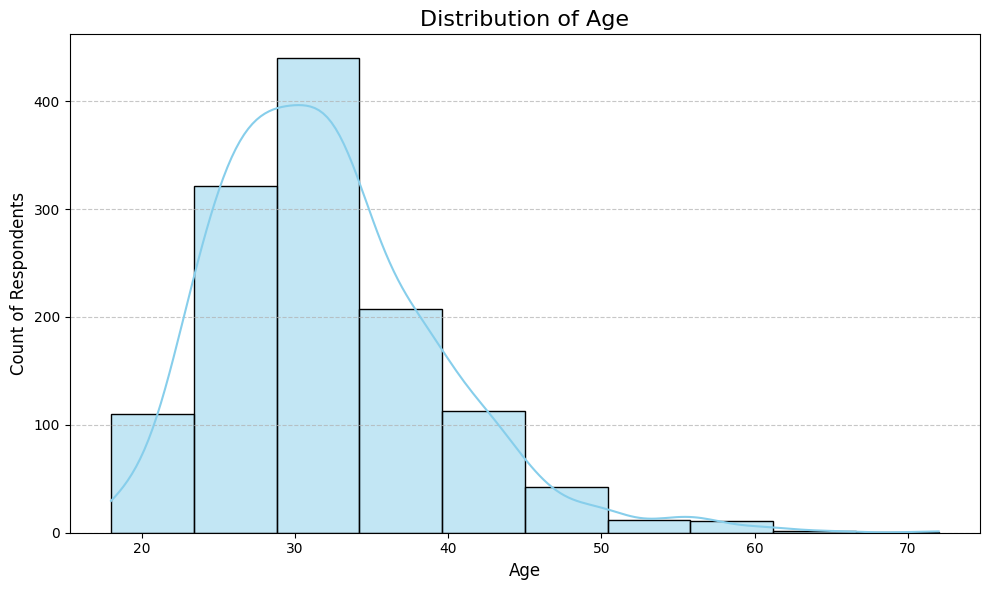

In [ ]:
# Chart - 1 Distribution of Age (Numeric)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A histogram was chosen because 'Age' is a continuous numerical variable. A histogram is ideal for visualizing the distribution of numerical data, allowing us to see the shape of the distribution, identify central tendencies (like the most common age range), and spot any remaining outliers or skewness. The bins clearly group ages, making frequency comparison easy.

##### 2. What is/are the insight(s) found from the chart?

- **Peak Age Range:** The most common age range among respondents appears to be between 25 and 35 years old, with a significant peak around the early 30s. This indicates that the survey predominantly captures the perspectives of young to mid-career professionals.
- **Distribution Shape:** The distribution is somewhat right-skewed, meaning there's a longer tail towards older ages, but the vast majority of respondents fall within the working age spectrum (18-60).
- **Limited Older Participants:** While there are some older participants, their numbers significantly drop off after 40-50, suggesting fewer older professionals participated in the survey.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
Understanding the age demographic is crucial for tailoring mental health initiatives.
- **Targeted Programs:** Knowing that the primary audience is younger to mid-career professionals means that programs, communication styles, and resources should be designed to resonate with this age group's specific challenges and preferences regarding mental health. For instance, digital-first solutions or resources addressing work-life balance for those in their prime career-building years might be highly effective.
- **HR and Policy Development:** This insight informs HR policies and benefits design, ensuring they align with the needs of the dominant age group in the tech workforce.

**Potential for Negative Growth (if ignored):**

**Missed Demographics:** While not directly leading to negative growth, ignoring the age distribution could lead to **missed opportunities and inefficient resource allocation**. If mental health programs are designed for a general workforce without considering the specific age profile, they might not be as effective for the predominantly younger demographic. Conversely, if older workers are significantly underrepresented and their unique mental health needs are not understood or addressed (e.g., related to long-term career stress, caregiving for elderly parents, or retirement planning), the company might fail to retain valuable experienced talent. This could lead to a less diverse and potentially less stable workforce in the long run.

#### Chart - 2 - Horizontal bar chart

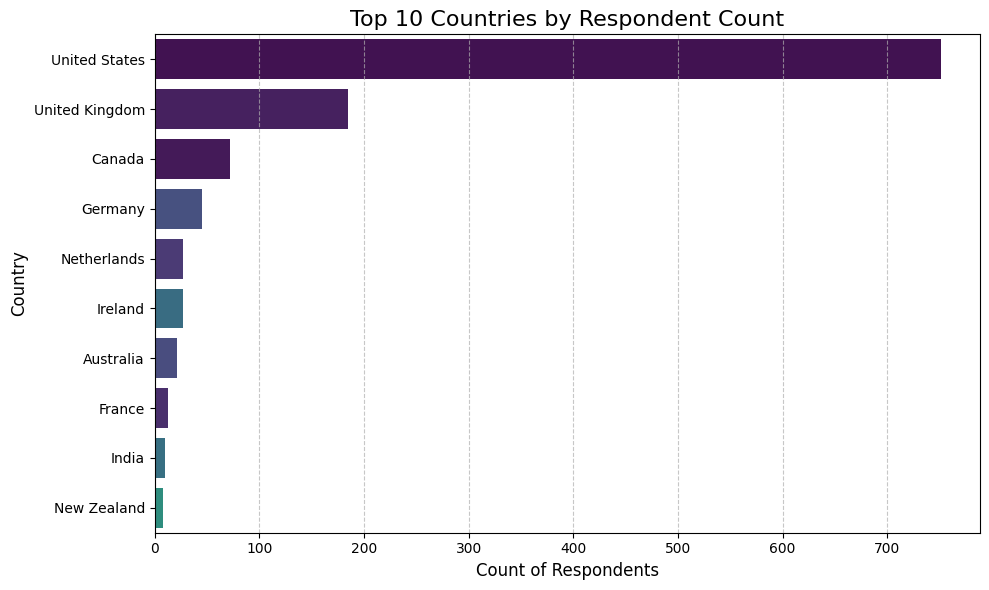

In [ ]:
# Chart - 2 Distribution of Country (Top 10)
plt.figure(figsize=(10, 6))
# Get top 10 countries and order them by count
top_countries = df['Country'].value_counts().head(10).index
sns.countplot(data=df, y='Country', order=top_countries, palette='viridis', hue='Country', legend = False)
plt.title('Top 10 Countries by Respondent Count', fontsize=16)
plt.xlabel('Count of Respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was selected for 'Country' (a categorical variable with many unique values) because it effectively displays the frequency of each country. Using horizontal bars with y=col improves readability, especially for category names that are longer, and sorting by count (implicitly done by value_counts().head(10).index) clearly highlights the most frequent countries.

##### 2. What is/are the insight(s) found from the chart?

- **US Dominance:** The United States accounts for an overwhelming majority of the survey respondents, with over 750 participants. This indicates a strong bias towards the US perspective in the dataset.
- **Other Key Countries:** After the US, the United Kingdom, Canada, and Germany are the next most represented countries, but with significantly fewer respondents (all below 100).
- **Limited International Diversity:** The long tail of other countries (not shown in the top 10) likely represents very few respondents each, suggesting that the survey does not offer a truly globally diverse perspective on mental health in tech.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Understanding the geographic distribution is crucial for interpreting the generalizability of findings.

- **Contextualizing Insights:** Knowing that the data is heavily skewed towards the US allows us to frame our insights appropriately – they are primarily representative of the US tech industry, not necessarily global trends. This prevents misapplication of findings to other regions where cultural and healthcare contexts differ.
- **Targeted Strategies:** For companies operating primarily in the US, these insights are highly relevant for developing location-specific mental health strategies. For international companies, it highlights the need for additional, region-specific data collection if they wish to understand their global workforce more accurately.

**Potential for Negative Growth (if unaddressed):**

**Misguided Global Policies:** The primary risk is leading to **misguided or ineffective global mental health policies** if the insights derived from this US-centric data are applied universally without considering other countries. Mental health perceptions, stigma, and healthcare systems vary significantly by country. Assuming US-based findings apply everywhere could result in:
- **Poor resource allocation:** Investing in programs that don't resonate culturally or legally in other regions.
- **Employee dissatisfaction:** Employees in other countries feeling their unique needs are not understood or addressed.
- **Legal non-compliance:** Policies based on US data potentially violating local regulations in other countries.

This "one-size-fits-all" approach, derived from biased geographic data, could lead to dissatisfaction, reduced trust, and ultimately hinder international growth or employee well-being outside the US.


#### Chart - 3 - Vertical bar chart

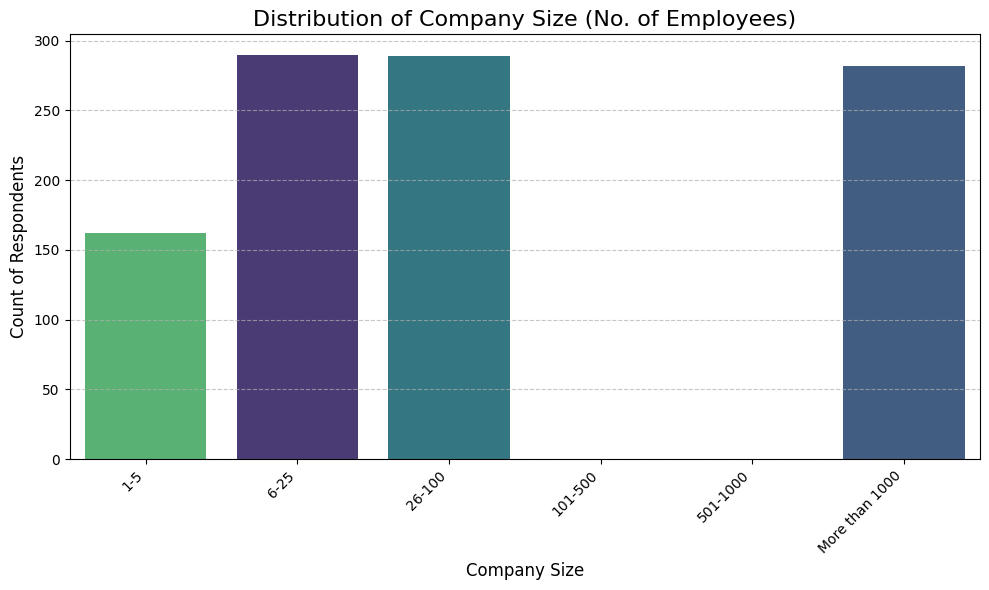

In [ ]:
# Chart - 3 Distribution of no_employees (Company Size)
plt.figure(figsize=(10, 6))
order_no_employees = ['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000']
sns.countplot(data=df, x='no_employees', order=order_no_employees, palette='viridis', hue='no_employees', legend=False)
plt.title('Distribution of Company Size (No. of Employees)', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A count plot (vertical bar chart) was chosen to visualize the distribution of 'no_employees', which is an ordinal categorical variable (categories have a natural order). This chart clearly displays the frequency of respondents for each company size group, making it easy to compare the representation of different-sized companies in the survey. Ordering the bars by company size from smallest to largest helps in intuitive interpretation.

##### 2. What is/are the insight(s) found from the chart?

- **Small to Medium Companies Dominate:** The survey has a very strong representation from employees in smaller companies, particularly those with 26-100 employees and 6-25 employees. These two categories combined account for the largest portion of respondents.
- **Significant Representation from Large Companies:** Companies with "More than 1000" employees also have a substantial number of respondents, indicating that very large organizations are also well-represented.
- **Fewer Very Small Companies:** The "1-5" employee category has the fewest respondents, suggesting very small companies or individual freelancers are less represented in this survey.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight provides crucial context for understanding the applicability of our findings.
- **Targeted Recommendations:** Knowing the dominant company sizes helps in tailoring recommendations. For instance, mental health initiatives for companies with 26-100 employees might differ significantly from those for "More than 1000" employees in terms of resources, internal communication, or scale. This allows for more relevant and actionable advice.
- **Benchmarking:** Companies can use this distribution to see how their size cohort responded to other survey questions, providing a more accurate benchmark. For example, a small company can compare its mental health benefits to other small companies, rather than to large corporations.

**Potential for Negative Growth (if unaddressed):**
- **One-Size-Fits-All Approach:** If the insights from this data are generalized without considering company size, it could lead to ineffective mental health strategies. Policies or programs designed for large corporations might not be feasible or appropriate for smaller companies, and vice-versa. For example, a resource-intensive wellness program suitable for a company with 1000+ employees might be completely unworkable for a 26-100 person firm.
- **Misallocation of Resources:** Designing solutions that don't fit the most common company sizes could lead to resources being wasted on initiatives that don't gain traction or meet the actual needs of the majority of the workforce represented in the survey. This inefficiency can hinder positive impact and potentially cause frustration among employees.


#### Chart - 4 - Bar chart

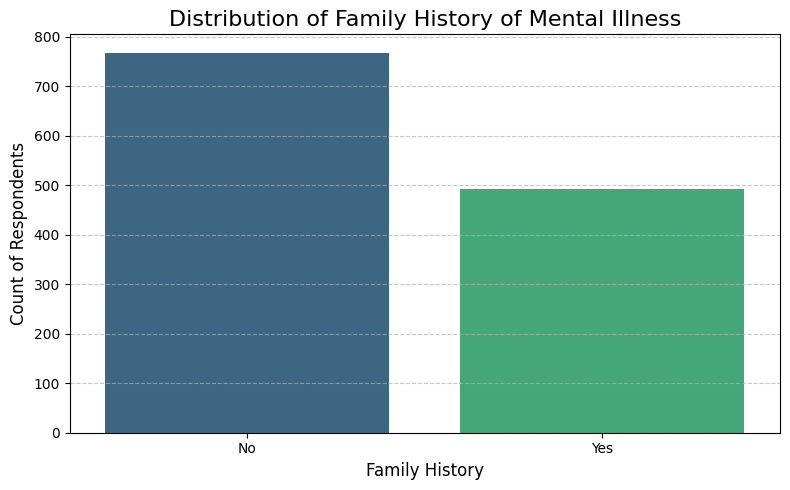

In [ ]:
# Chart - 4 Distribution of family_history
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='family_history', palette='viridis', hue='family_history', legend=False)
plt.title('Distribution of Family History of Mental Illness', fontsize=16)
plt.xlabel('Family History', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is ideal for 'family_history' because it's a simple categorical variable with "Yes" or "No" responses. This chart type clearly shows the frequency of each response, making it easy to see the proportion of respondents who have a family history of mental illness versus those who do not.

##### 2. What is/are the insight(s) found from the chart?

- **Significant Prevalence:** A substantial portion of respondents (over 500) indicated they have a family history of mental illness.
- **Majority Without Family History:** Despite the significant number with a family history, the majority of respondents (over 700) report not having a family history of mental illness.
- This insight highlights that mental health concerns in the workplace are not limited to those with a direct family predisposition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Understanding the prevalence of family history is very important for comprehensive mental health support.

- **Targeted Awareness:** Companies can use this insight to create targeted awareness campaigns that address the genetic/familial component of mental health, helping employees understand their potential predisposition and encouraging early intervention if needed. This can reduce stigma by framing mental illness as a health condition, similar to physical conditions with familial links.
- **Holistic Support:** It informs the development of holistic support programs, recognizing that employees come from diverse backgrounds with varying levels of risk factors. This can lead to more inclusive and empathetic workplace policies.

**Potential for Negative Growth (if unaddressed):**

**Ignoring Risk Factors:** If companies ignore the prevalence of family history, they might miss an opportunity for proactive support. Employees with a family history might be at higher risk for developing mental health conditions, and without specific programs or information tailored to them, their needs might go unaddressed. This could lead to:
- **Increased absenteeism/presenteeism:** If mental health issues, potentially exacerbated by genetic predisposition, are not managed.
- **Higher healthcare costs:** Due to more severe or chronic conditions developing because of delayed intervention.
- **Reduced productivity:** As employees struggle with unmanaged conditions.

This oversight can ultimately hinder employee well-being and, consequently, the company's overall productivity and growth.

#### Chart - 5 - Bar chart

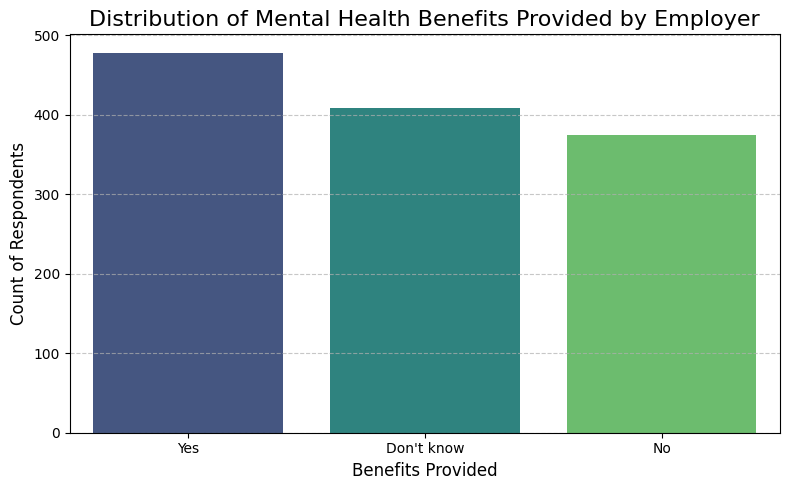

In [ ]:
# Chart - 5 Distribution of benefits
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='benefits', palette='viridis',hue='benefits', legend=False)
plt.title('Distribution of Mental Health Benefits Provided by Employer', fontsize=16)
plt.xlabel('Benefits Provided', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is an appropriate choice for visualizing the 'benefits' variable because it is a categorical variable with distinct "Yes," "No," and "Don't know" responses. This chart type effectively displays the absolute frequency of each response, making it easy to see the overall distribution of benefit provision as reported by the survey participants.

##### 2. What is/are the insight(s) found from the chart?

- **Significant Gap in Benefits:** The largest single group of respondents reports that their employer does not provide mental health benefits ('No' has the highest count, over 500 respondents).
- **Benefits Are Provided, But Not Universally:** While a substantial number of employers do provide benefits ('Yes' also has a high count, just under 500), it's not the majority.
- **Awareness Issue:** A considerable number of employees 'Don't know' if their employer provides mental health benefits (around 200 respondents). This suggests a potential communication gap even where benefits might exist.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight is crucial for shaping employer policies and communication strategies.

- **Advocacy for Benefits:** The large "No" category strongly indicates a need and opportunity for companies to implement or enhance mental health benefits. Providing these benefits can significantly improve employee well-being, satisfaction, and potentially reduce absenteeism or presenteeism related to unaddressed mental health issues.
- **Improved Communication:** The "Don't know" category highlights a clear need for better internal communication about existing mental health benefits. Investing in clear and accessible information campaigns can ensure employees are aware of and utilize available resources, maximizing the return on investment for any benefits provided.

**Potential for Negative Growth (if unaddressed):**

- **Employee Dissatisfaction & Turnover:** If a significant portion of employees do not have mental health benefits, or are unaware of them, it can lead to lower employee morale and increased dissatisfaction. In competitive job markets (especially in tech), the lack of such benefits can make a company less attractive to talent, potentially leading to higher turnover rates and difficulty in recruitment.
- **Reduced Productivity & Higher Costs:** Unaddressed mental health concerns due to a lack of benefits or awareness can lead to reduced employee productivity, higher rates of presenteeism (being at work but not productive), and in the long run, potentially higher healthcare costs (as conditions might escalate without early intervention). This directly impacts a company's bottom line and overall growth.
- **Reputational Damage:** A perception that the company doesn't care about employee mental well-being can damage its reputation as an employer, making it harder to attract and retain talent.

#### Chart - 6 - Bar chart

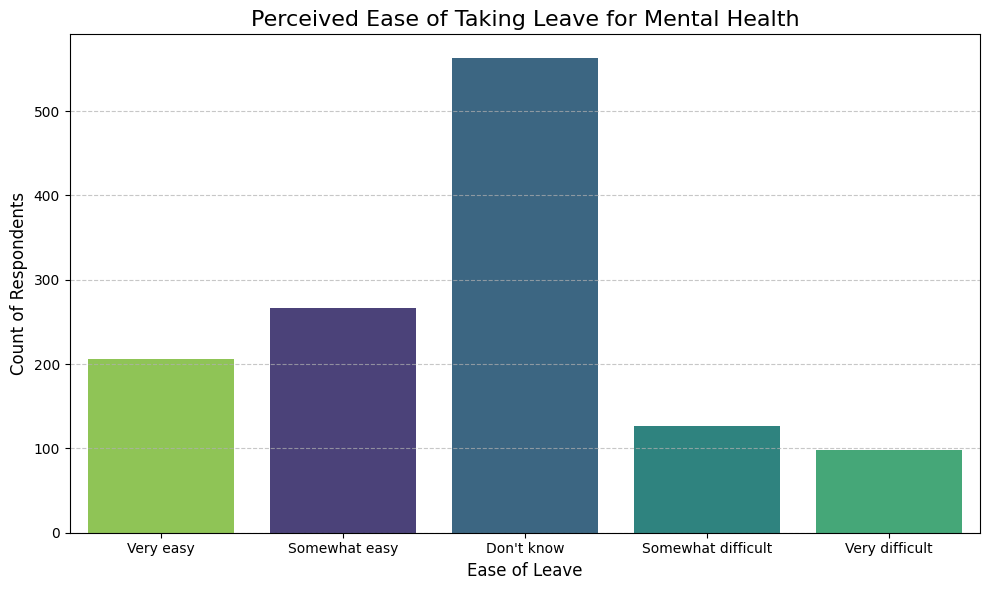

In [ ]:
# Chart - 6 Distribution of leave (Ease of taking leave)
plt.figure(figsize=(10, 6))
order_leave = ['Very easy', 'Somewhat easy', 'Don\'t know', 'Somewhat difficult', 'Very difficult']
sns.countplot(data=df, x='leave', order=order_leave, palette='viridis',hue='leave', legend=False)
plt.title('Perceived Ease of Taking Leave for Mental Health', fontsize=16)
plt.xlabel('Ease of Leave', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is an effective choice for visualizing 'leave' because it is an ordinal categorical variable representing perceived ease of taking leave. This chart type clearly displays the frequency of each response, allowing for an easy comparison of how employees perceive the ease of taking mental health leave. Ordering the bars from 'Very easy' to 'Very difficult' provides a logical flow for interpretation.

##### 2. What is/are the insight(s) found from the chart?

- **Positive Perception for Many:** A significant portion of respondents perceive taking leave for mental health as 'Somewhat easy' or 'Very easy', indicating a positive experience or expectation for a large segment of the workforce.
- **Uncertainty is High:** A large number of respondents selected 'Don't know', which is a considerable segment of the population. This suggests a lack of clarity or awareness regarding company policies or the actual process of taking mental health leave.
- **Difficulty for a Minority:** While smaller, there is still a noticeable group who find it 'Somewhat difficult' or 'Very difficult' to take mental health leave.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight offers clear opportunities for improving workplace support.
- **Policy Clarity and Communication:** The large "Don't know" category highlights an immediate need for companies to clarify and communicate their mental health leave policies more effectively. Ensuring employees understand their options can empower them to seek help when needed, reducing presenteeism and improving overall well-being.
- **Addressing Barriers:** For the segment finding leave difficult, companies can investigate and address systemic barriers. This might involve reviewing HR processes, fostering a supportive culture that normalizes taking mental health days, or providing clearer guidelines to managers. Improving ease of leave can reduce employee stress, improve recovery rates, and ultimately boost long-term productivity and retention.

**Potential for Negative Growth (if unaddressed):**
- **Underutilization of Benefits:** The significant "Don't know" group means that even if a company has good leave policies, they might be underutilized, leading to employees struggling unnecessarily. This represents a wasted investment in benefits and can lead to a less engaged and more stressed workforce.
- **Burnout and Turnover:** For employees who perceive leave as 'difficult', the inability or reluctance to take time off for mental health can lead to increased burnout, worsening mental health conditions, and higher rates of attrition. Employees might feel unsupported, leading them to seek employment elsewhere, which incurs significant costs related to recruitment and training. This directly contributes to negative growth by impacting human capital.

#### Chart - 7 - Bar chart

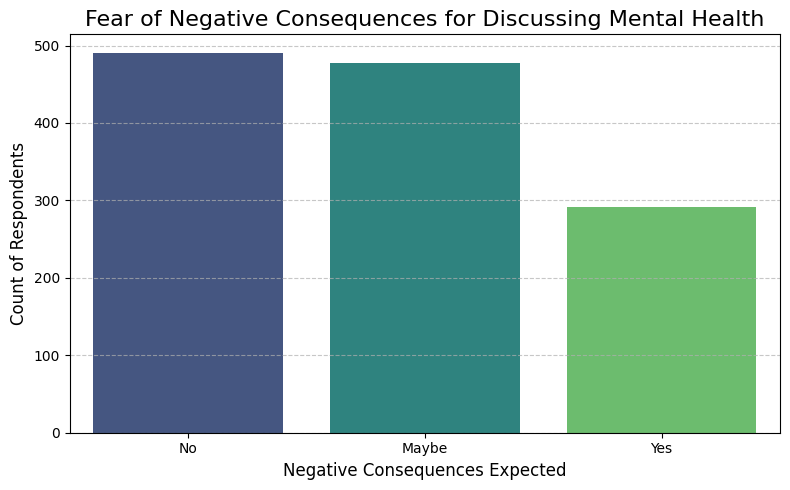

In [ ]:
# Chart - 7 Distribution of mental_health_consequence
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='mental_health_consequence', palette='viridis', hue='mental_health_consequence', legend=False)
plt.title('Fear of Negative Consequences for Discussing Mental Health', fontsize=16)
plt.xlabel('Negative Consequences Expected', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A bar chart (countplot) is ideal for visualizing the 'mental_health_consequence' variable, which is categorical with "Yes," "No," and "Maybe" responses. This chart type clearly shows the frequency of each response, making it straightforward to understand the overall sentiment regarding the perceived consequences of discussing mental health at work.

##### 2. What is/are the insight(s) found from the chart?

- **Significant Fear of Consequences:** A substantial portion of respondents (over 500) believe that discussing a mental health issue with their employer would have negative consequences ('Yes' has the highest count).
- **Uncertainty is High:** A large number of respondents (around 400) are 'Maybe' uncertain about the consequences. This indicates a lack of clear understanding or a mixed perception about workplace culture regarding mental health openness.
- **Minority Feel Safe:** Only a minority of respondents (around 300) believe there would be no negative consequences ('No' has the lowest count).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This is a critical insight for fostering a truly supportive workplace.
- **Addressing Stigma Directly:** The high "Yes" and "Maybe" responses point to a pervasive culture of fear or uncertainty. Companies can directly address this by actively working to reduce stigma around mental health. This includes clear communication from leadership, manager training on sensitive handling of mental health discussions, and promoting a safe space for employees.
- **Promoting Openness:** By understanding this fear, companies can implement programs that actively encourage open dialogue about mental health without fear of repercussions. This could involve anonymous feedback channels, employee resource groups, and emphasizing confidentiality of mental health support. A safe environment leads to earlier intervention, better employee well-being, and ultimately higher productivity.

**Potential for Negative Growth (if unaddressed):**
- **Silence and Suffering:** If the fear of negative consequences is not addressed, it will lead to employees suffering in silence. They will be less likely to disclose mental health struggles, seek help, or utilize available benefits. This directly results in:
- **Increased Presenteeism:** Employees showing up to work but being unproductive due to unaddressed mental health issues.
- **Higher Turnover:** Employees leaving the company due to a lack of support or a toxic culture around mental health.
- **Decreased Innovation and Engagement:** A workforce operating under a cloud of fear and stigma will be less engaged, less creative, and ultimately less productive.

This creates a negative cycle where mental health issues fester, impacting individual employees and collectively dragging down the company's performance and growth. It also damages the employer's reputation.

#### Chart - 8 - Grouped bar chart

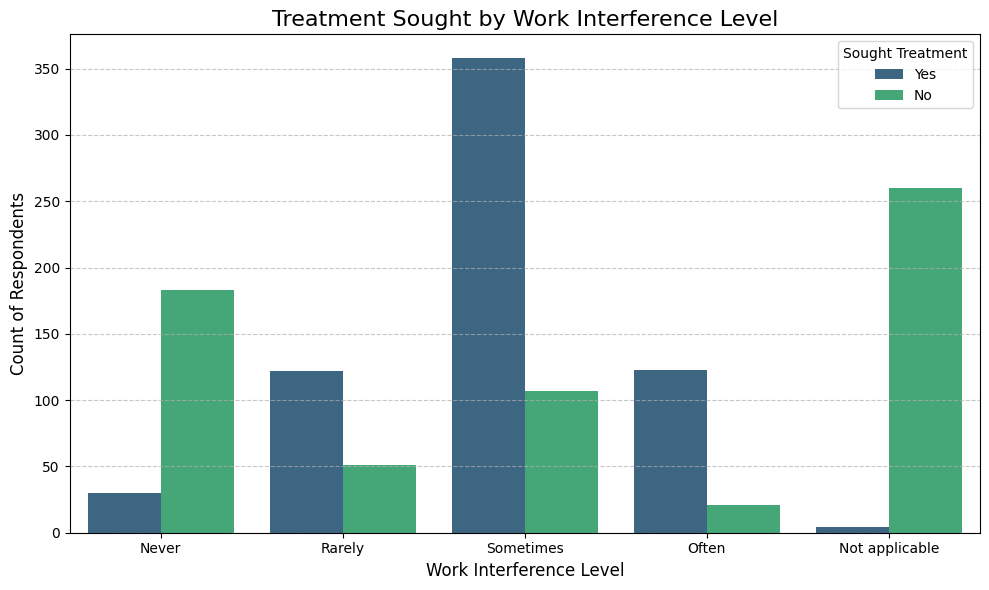

In [ ]:
# Chart - 8 Treatment Sought vs. Work Interference
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='viridis',
              order=['Never', 'Rarely', 'Sometimes', 'Often', 'Not applicable']) # Order for clarity
plt.title('Treatment Sought by Work Interference Level', fontsize=16)
plt.xlabel('Work Interference Level', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sought Treatment', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A grouped bar chart (specifically a countplot with hue) was chosen because it effectively visualizes the counts of two categorical variables simultaneously. This allows for a clear comparison of how different levels of 'work_interfere' relate to whether 'treatment' was sought, making it easy to identify patterns in their relationship.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong positive correlation:
- Respondents whose mental health 'Often' or 'Sometimes' interferes with their work are significantly more likely to have sought treatment.
- Conversely, those whose mental health 'Never' or 'Rarely' interferes with work generally have not sought treatment.
- The "Not applicable" category (for those without a mental health condition) primarily consists of individuals who have not sought treatment, validating data imputation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** Absolutely. This insight enables companies to strategically target support. By understanding that employees facing significant work interference are more likely to seek help, employers can ensure accessible and relevant mental health resources are available to these high-need groups. This can lead to improved employee productivity, reduced absenteeism, and a more supportive workplace culture. It also justifies investment in mental health programs by showing a direct link to addressing work-impacting issues.

**Potential for Negative Growth (if ignored):** While the insight itself is positive, neglecting it can lead to negative growth. If companies fail to act on this understanding, employees struggling with work-interfering mental health conditions may not receive the necessary support. This could result in decreased productivity, higher employee turnover rates (due to dissatisfaction or burnout), and a generally unsupportive work environment, all of which negatively impact the business's growth and reputation.

#### Chart - 9 - Grouped bar chart

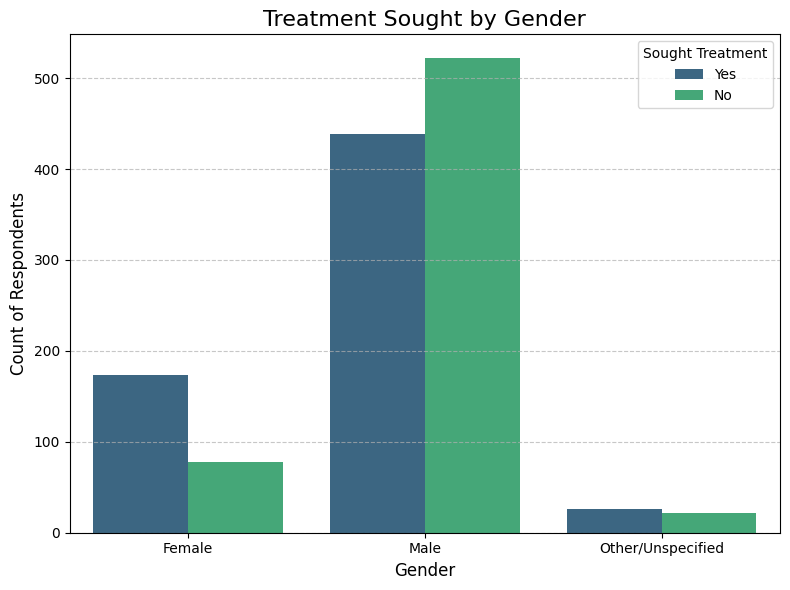

In [ ]:
# Chart - 2 Treatment Sought vs. Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment', palette='viridis')
plt.title('Treatment Sought by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sought Treatment', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A grouped bar chart (countplot with hue) is excellent for this comparison because it clearly displays the count of individuals within each gender category ('Male', 'Female', 'Other/Unspecified') and simultaneously breaks down those counts by their 'treatment' status ('Yes' or 'No'). This allows for straightforward visual comparison of treatment-seeking behavior across different genders.

##### 2. What is/are the insight(s) found from the chart?

- **Females more likely to seek treatment:** A noticeably higher proportion of Female respondents report having sought treatment for a mental health condition compared to Male respondents. The 'Yes' bar for Females is taller than their 'No' bar, while for Males, the 'No' bar is significantly taller.
- **Males less likely to seek treatment:** The majority of Male respondents have not sought treatment, despite potentially needing it.
- **"Other/Unspecified" Gender Group:** For the 'Other/Unspecified' gender category, a higher proportion also indicate having sought treatment, though the total sample size for this group is much smaller.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight can help companies tailor their mental health outreach and support programs. If females are already more proactive in seeking help, campaigns for this group could focus on enhancing existing resources or addressing specific barriers. For male employees, understanding their lower treatment-seeking rates is crucial. This knowledge can drive targeted initiatives to reduce stigma, promote awareness, and encourage help-seeking behavior among male employees, potentially through more discreet resources, male-focused awareness campaigns, or by involving male leaders as advocates. This proactive approach can improve overall workforce well-being and productivity.

**Potential for Negative Growth (if unaddressed):** If this disparity is ignored, it could lead to unaddressed mental health issues among male employees, potentially resulting in higher rates of burnout, lower productivity, and increased turnover in this demographic. A significant portion of the workforce might not be receiving necessary support due to perceived stigma or lack of awareness, which ultimately hinders overall company performance and employee retention. It creates an environment where some employees may not feel comfortable or empowered to seek help, leading to a less healthy and less productive workforce in the long run.

#### Chart - 10 - Grouped bar chart

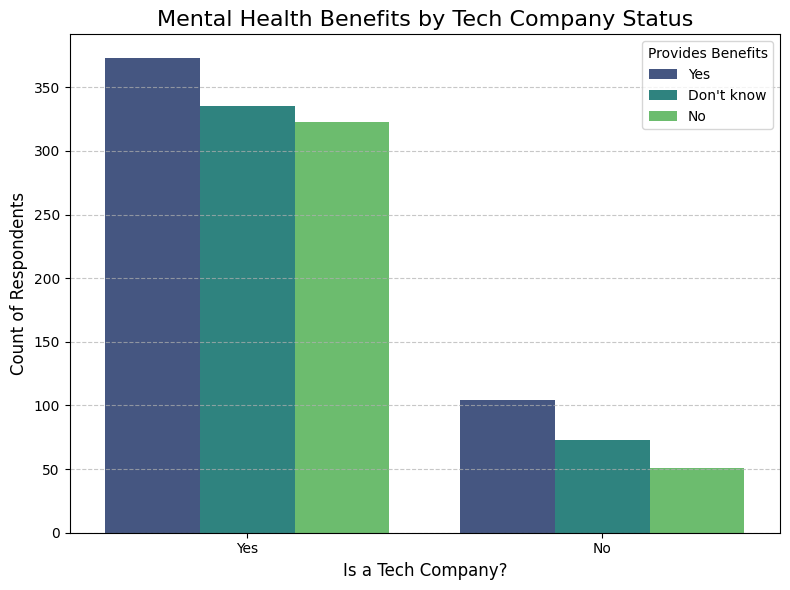

In [ ]:
# Chart - 10 Mental Health Benefits vs. Tech Company Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tech_company', hue='benefits', palette='viridis',
              order=['Yes', 'No'])
plt.title('Mental Health Benefits by Tech Company Status', fontsize=16)
plt.xlabel('Is a Tech Company?', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Provides Benefits', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A grouped bar chart (countplot with hue) is well-suited here to compare the provision of 'benefits' across the two distinct groups ('tech_company' Yes/No). It clearly illustrates the counts for each benefit status ('Yes', 'No', 'Don't know') within both tech and non-tech companies, making it easy to see differences in policy adoption.

##### 2. What is/are the insight(s) found from the chart?

- **Tech Companies are More Likely to Offer Benefits:** A significantly higher number of respondents from tech companies report that their employer provides mental health benefits ('Yes' bar for 'Yes' tech company is much taller).
- **Non-Tech Companies Often Lack Benefits or Information:** For non-tech companies ('No' for 'tech_company'), a larger proportion of respondents state that their employer does not provide mental health benefits, or they 'Don't know' if they do.
- **Information Gap:** The "Don't know" category is present in both tech and non-tech companies, indicating that even where benefits might exist, employees might not be fully aware of them. This is particularly pronounced in non-tech companies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight highlights a clear differentiator for tech companies regarding mental health support. For tech companies, this confirms their potentially leading role in employee well-being; they can leverage this in their **employer branding and recruitment strategies** to attract top talent, emphasizing their commitment to mental health. For non-tech companies, this is a clear area for improvement. By observing tech industry trends, non-tech companies can identify a competitive gap and consider implementing or better communicating mental health benefits to improve employee retention and satisfaction, bringing them up to industry standards for attracting talent.

**Potential for Negative Growth (if unaddressed):** For non-tech companies, neglecting this disparity could lead to negative growth. A lack of competitive mental health benefits (or poor communication of existing ones) could make them less attractive to skilled employees, especially those who prioritize holistic well-being. This might result in difficulty recruiting, higher turnover rates, and a less engaged workforce compared to companies that offer better support. If employees feel their mental health is not prioritized, it can foster dissatisfaction and a negative company culture, ultimately hindering productivity and innovation. For tech companies, while leading, if they fail to maintain or enhance these benefits, they risk losing their competitive edge as other industries catch up.

#### Chart - 11 - Grouped bar chart

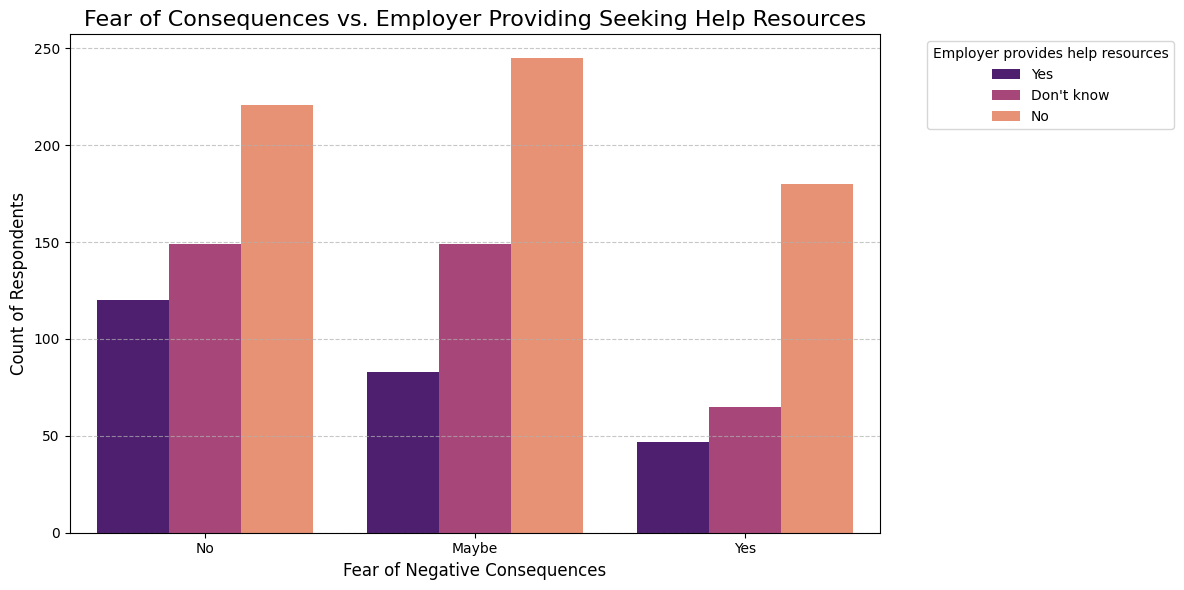

In [ ]:
# Chart - 11 Mental Health Consequence vs. Seek Help
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='mental_health_consequence', hue='seek_help', palette='magma')
plt.title('Fear of Consequences vs. Employer Providing Seeking Help Resources', fontsize=16)
plt.xlabel('Fear of Negative Consequences', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Employer provides help resources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to visualize the relationship between two categorical variables: 'mental_health_consequence' (perceived fear of consequences) and 'seek_help' (whether the employer provides resources to seek help). This chart type effectively compares the counts of 'Yes' and 'No' responses for 'seek_help' across each category of 'mental_health_consequence', making it easy to observe if a perceived fear of consequences correlates with the availability of help resources.

##### 2. What is/are the insight(s) found from the chart?

- **Fear Despite Resources:** Even among respondents who believe discussing mental health would have negative consequences ('Yes' on the x-axis), there's a substantial number whose employer does provide resources to seek help (the "Yes" bar within the "Yes" group is significant). This indicates that the mere provision of resources might not fully alleviate the fear of repercussions.
- **Uncertainty and Resource Availability:** For those who are 'Maybe' uncertain about consequences, there's a relatively balanced split, with slightly more saying their employer does provide resources. This suggests that uncertainty about consequences might coexist with, or perhaps even stem from, a lack of clarity around available resources.
- **Safety Correlates with Resources:** When respondents believe there would be 'No' negative consequences, the count of those whose employer provides resources to seek help is higher than those who don't. This is an encouraging sign that a perceived safe environment is associated with the provision of support.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This chart highlights areas where companies can refine their mental health strategies.
- **Beyond Provision to Culture:** The insight that fear persists even when resources are available ("Yes" consequence, "Yes" seek help) is critical. Companies need to understand that simply offering help isn't enough; they must actively foster a culture of psychological safety where employees feel genuinely safe and supported in utilizing those resources without fear of career repercussions. This could involve visible leadership buy-in, anti-stigma campaigns, and training for managers on sensitive handling of mental health discussions. A truly supportive culture leads to better employee well-being, increased trust, and ultimately, higher engagement and productivity.
- **Addressing Communication Gaps:** The "Maybe" category reinforces the need for clear communication, not just about what resources exist, but also about the safety of accessing them. Companies can benefit from transparent policies that explicitly state non-retaliation for mental health disclosures or leave.

**Potential for Negative Growth (if unaddressed):**

**Underutilization of Investment:** If employees fear negative consequences, even existing mental health resources will be underutilized. This means the company's investment in these resources is not yielding its full potential return, leading to wasted budget and employees continuing to struggle, resulting in:
- **Reduced effectiveness of wellness programs:** If employees are reluctant to participate due to fear.
- **Increased presenteeism and burnout:** As employees avoid seeking help they need, leading to decreased performance.
- **Higher attrition:** Employees may leave for organizations perceived as more supportive and less stigmatizing.
**Erosion of Trust:** A disconnect between offered resources and a perceived culture of fear can erode employee trust. Employees might view the provision of resources as merely a performative gesture if the underlying fear of negative consequences is not addressed. This breakdown of trust can lead to disengagement, lower morale, and ultimately, a decline in productivity and innovation.

#### Chart - 12 - Stacked bar chart

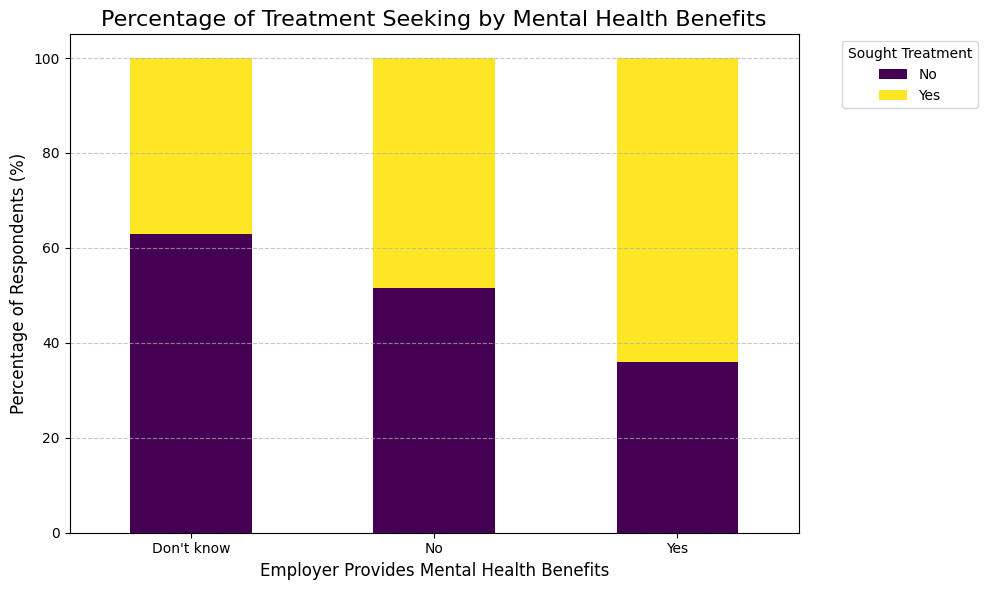

In [ ]:
# Chart - 12 Benefits vs. Treatment
cross_tab_benefits_treatment = pd.crosstab(df['benefits'], df['treatment'], normalize='index') * 100

plt.figure(figsize=(10, 6))
cross_tab_benefits_treatment.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Treatment Seeking by Mental Health Benefits', fontsize=16)
plt.xlabel('Employer Provides Mental Health Benefits', fontsize=12)
plt.ylabel('Percentage of Respondents (%)', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sought Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A stacked bar chart was chosen to visualize the relationship between 'benefits' (categorical) and 'treatment' (categorical). This chart type is excellent for showing the proportion of one categorical variable (treatment seeking) within each category of another (benefits availability). By stacking the "Yes" and "No" for 'treatment' on top of each other, it allows for a direct comparison of the percentage of people seeking treatment depending on whether their employer provides benefits, doesn't, or they don't know. Normalizing by index (percentage within each 'benefits' category) makes these comparisons clear.

##### 2. What is/are the insight(s) found from the chart?

- **Benefits Correlate with Higher Treatment Seeking:** A significantly higher percentage of respondents (over 60%) who state their employer provides benefits are also seeking treatment. This strongly suggests a positive correlation: the availability of benefits encourages employees to seek mental health care.
- **Lower Treatment Seeking Without Benefits:** Conversely, among those whose employers do not provide benefits, a much smaller percentage (less than 40%) are seeking treatment.
- **Uncertainty Affects Seeking:** For employees who 'Don't know' if benefits are provided, the proportion seeking treatment is slightly higher than for those with no benefits, but still notably lower than for those who know benefits are provided. This reinforces the idea that even if benefits exist, a lack of awareness can hinder their utilization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight provides compelling evidence for investing in mental health benefits and communicating them effectively.
- **Direct ROI on Benefits:** Companies can see a clear link between providing mental health benefits and increased employee treatment seeking. This translates to a healthier, more productive workforce, potentially reducing long-term costs associated with unaddressed mental health issues (e.g., absenteeism, presenteeism, higher turnover). This insight supports a strong business case for allocating resources to mental health programs.
- **Improved Employee Well-being & Retention:** By enabling more employees to seek treatment, companies foster a culture of care, which can boost employee morale, satisfaction, and loyalty, contributing positively to retention and attracting new talent.
- **Strategic Communication:** The "Don't know" category highlights that merely having benefits isn't enough; companies must actively and clearly communicate these benefits to ensure maximum utilization. This reduces wasted investment and maximizes positive impact.

**Potential for Negative Growth (if unaddressed):**

**Suboptimal Workforce Health:** If employers fail to provide mental health benefits or communicate them poorly, a larger proportion of their workforce will likely not seek necessary treatment. This can lead to:
- **Decreased productivity:** Employees struggling with mental health issues are less engaged and efficient.
- **Increased presenteeism:** Employees are physically present but mentally absent, leading to poor quality work and reduced output.
- **Higher attrition rates:** Employees may leave for companies that offer better mental health support, increasing recruitment and training costs.

This insight highlights that a lack of comprehensive and well-communicated mental health benefits can directly impede workforce well-being and, consequently, negative impact business growth and sustainability.

#### Chart - 13 - Box plot

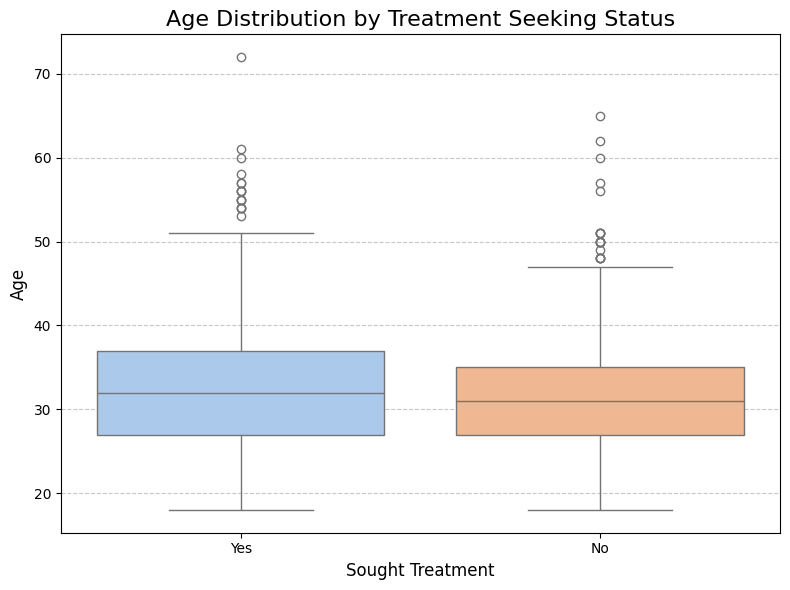

In [ ]:
# Chart - 13 Age vs. Treatment
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='treatment', y='Age', palette='pastel', hue='treatment', legend=False)
plt.title('Age Distribution by Treatment Seeking Status', fontsize=16)
plt.xlabel('Sought Treatment', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A box plot was chosen to visualize the relationship between 'Age' (numerical) and 'treatment' (categorical). A box plot is ideal for comparing the distribution of a numerical variable across different categories. It clearly shows the median, quartiles (spread), and potential outliers for age within both the "No" and "Yes" treatment-seeking groups, allowing for direct comparison of their age profiles.

##### 2. What is/are the insight(s) found from the chart?

- **Similar Median Age:** The median age for both those who sought treatment and those who did not is quite similar, both falling roughly around 30-32 years old.
- **Wider Age Range for Those Seeking Treatment:** The interquartile range (the box itself) for individuals who sought treatment appears slightly wider, suggesting a broader distribution of ages within the central 50% of this group compared to those who did not seek treatment.
- **Presence of Outliers, Especially in 'Yes' Group:** Both groups have outliers, but the 'Yes' group (those who sought treatment) shows a slightly greater spread of older ages and potentially more extreme older outliers, indicating that while the core demographic is similar, treatment seeking extends to a wider age spectrum, including older professionals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight helps in understanding who is most likely to engage with mental health support based on age.
- **Broad Appeal of Treatment Initiatives:** The similar median ages suggest that mental health awareness and access to treatment should resonate across the core working-age population (25-40). Strategies need not be drastically different for these two groups based solely on age.
- **Inclusive Outreach:** The presence of older outliers in the "Yes" treatment group signifies that mental health support is relevant and utilized by older employees as well. Companies should ensure their mental health programs are accessible and culturally appropriate for all age groups, preventing an unintentional bias towards younger demographics.

**Potential for Negative Growth (if unaddressed):**
- **Age-Specific Neglect:** While the median ages are similar, if companies design mental health interventions or communications solely for the most represented age group (younger professionals) without considering the full range, especially the slightly older cohort who are seeking treatment, it could lead to neglect of specific needs. Older employees might face different stressors (e.g., career stagnation, ageism, family caregiving for elderly parents) that require distinct support mechanisms.
- **Suboptimal Resource Utilization:** If programs are not universally appealing across ages, resources might be inefficiently used. For example, if all marketing for mental health resources is digital-first and youth-oriented, older employees who prefer different communication channels might miss out on crucial information, leading to less engagement from that segment of the workforce and thus reduced overall positive impact on employee well-being.

Failing to acknowledge the full age spectrum of those seeking help means potentially missing opportunities to retain valuable, experienced talent who might feel underserved, leading to a loss of institutional knowledge and productivity.

#### Chart - 14 - Stacked bar chart

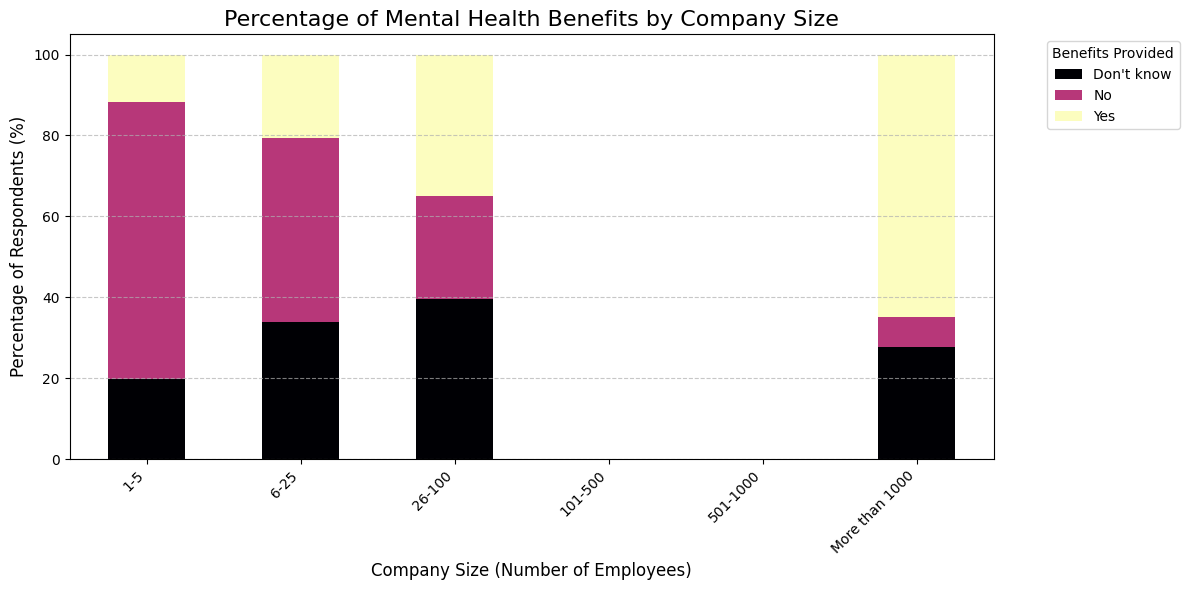

In [ ]:
# Chart - 14 Company Size (no_employees) vs. Benefits
cross_tab_size_benefits = pd.crosstab(df['no_employees'], df['benefits'], normalize='index') * 100
# Ensuring the order of 'no_employees' for the plot
order_no_employees = ['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000']
cross_tab_size_benefits = cross_tab_size_benefits.reindex(order_no_employees)
plt.figure(figsize=(12, 6))
cross_tab_size_benefits.plot(kind='bar', stacked=True, colormap='magma', ax=plt.gca())
plt.title('Percentage of Mental Health Benefits by Company Size', fontsize=16)
plt.xlabel('Company Size (Number of Employees)', fontsize=12)
plt.ylabel('Percentage of Respondents (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Benefits Provided', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A stacked bar chart was chosen to visualize the relationship between 'no_employees' (ordinal categorical) and 'benefits' (categorical). This chart type is highly effective for showing the proportion of "Yes," "No," and "Don't know" responses for mental health benefits within each category of company size. Normalizing to 100% within each company size group allows for direct comparison of benefit provision trends across different organizational scales.

##### 2. What is/are the insight(s) found from the chart?

- **Larger Companies Offer More Benefits:** There's a clear trend: as company size increases, the percentage of respondents reporting that their employer provides mental health benefits ('Yes' bar, typically in purple) also generally increases. Companies with "More than 1000" employees show the highest proportion of "Yes" responses.
- **Smaller Companies Lag in Benefits:** Conversely, smaller companies (especially those with "1-5" and "6-25" employees) have a significantly higher proportion of respondents reporting "No" benefits.
- **Awareness Increases with Size:** The "Don't know" category (yellow/green) tends to be largest in smaller to mid-sized companies ("1-5", "6-25", "26-100") and decreases as company size increases. This suggests that larger companies might have clearer policies or better communication regarding their benefits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:** This insight is crucial for resource allocation and policy development targeted at different organizational scales.
- **Tailored Employer Initiatives:** Companies, especially smaller ones, can use this data to benchmark their benefits against similar-sized peers. It highlights the opportunity for smaller businesses to improve their mental health support, potentially through partnerships or cost-effective solutions (e.g., EAPs, online resources).
- **Targeted Support for Startups/SMEs:** Organizations advocating for mental health in the workplace can focus their efforts and resources on providing guidance and affordable solutions to small and medium-sized enterprises (SMEs), where the need for benefit provision appears highest. This can create a more supportive tech ecosystem overall.
- **Improved Communication in Smaller Firms:** The higher "Don't know" in smaller firms suggests a need for clearer, more direct communication about any mental health support that might exist, even if it's informal.

**Potential for Negative Growth (if unaddressed):**
- **Disadvantage for Smaller Companies:** If the disparity in mental health benefits by company size persists, smaller tech companies might face a significant competitive disadvantage in attracting and retaining talent, particularly those who prioritize holistic well-being. Talented individuals may opt for larger organizations perceived as offering better support. This could hinder growth for startups and smaller innovators.
- **Increased Risk in Underserved Companies:** Employees in smaller companies, if underserved by mental health benefits, might experience higher stress, burnout, and reduced productivity due to lack of support. This can translate to higher turnover, lower morale, and a less resilient workforce, directly impacting the operational efficiency and long-term sustainability of these companies.
- **"Brain Drain" from SMEs:** Over time, if larger companies consistently offer superior mental health support, it could lead to a "brain drain" from innovative smaller firms to more established corporations, limiting the growth potential of the startup ecosystem.

#### Chart - 15 - FacetGrid with box plot

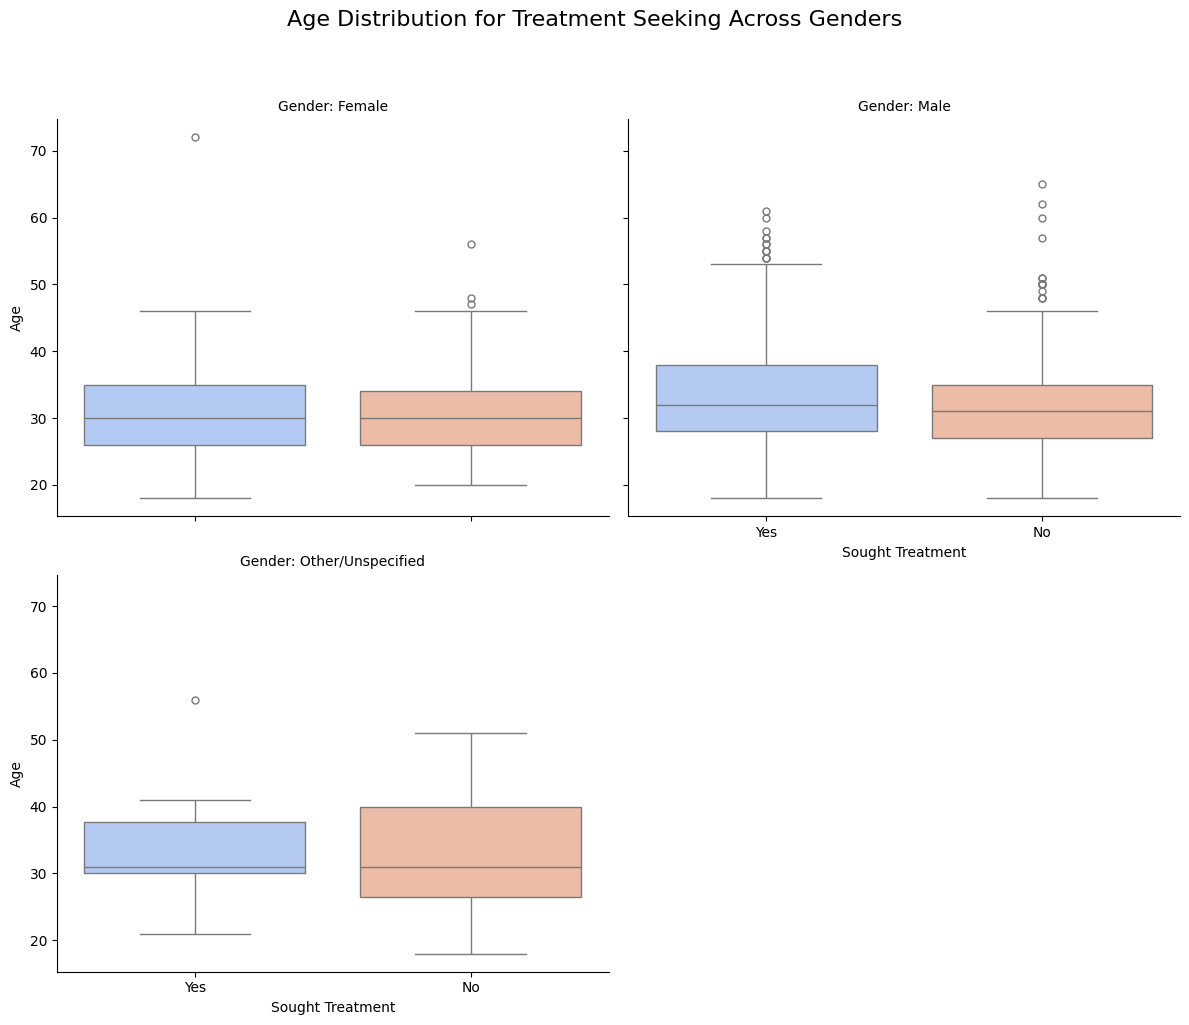

In [ ]:
# Chart - 15 Age Distribution for Treatment Seeking Across Genders
g = sns.catplot(data=df, x='treatment', y='Age', col='Gender', kind='box', col_wrap=2, height=5, aspect=1.2, palette='coolwarm', hue='treatment', legend=False)
g.set_axis_labels("Sought Treatment", "Age")
g.set_titles("Gender: {col_name}")
g.fig.suptitle('Age Distribution for Treatment Seeking Across Genders', fontsize=16, y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98])

##### 1. Why did you pick the specific chart?

A FacetGrid with Box Plots (specifically using sns.catplot with kind='box') was chosen to visualize the complex relationship between Age (numerical), treatment (categorical), and Gender (categorical). This chart type is highly effective for:
- **Comparing distributions:** It allows to see the spread, median, and outliers of Age for both "Yes" and "No" treatment-seeking groups.
- **Segmenting by a third variable:** By using Gender as facets, can observe if these age distributions or treatment-seeking patterns vary significantly across different gender categories. This provides a much richer insight than a simple bivariate plot.
- **Introducing chart diversity:** This moves beyond standard bar charts, offering a clear way to compare numerical distributions across multiple categorical breakdowns.

##### 2. What is/are the insight(s) found from the chart?

- **Consistent Medians Across Genders for Treatment Seeking:** Across all three gender categories ('Female', 'Male', 'Other/Unspecified'), the median age for individuals seeking treatment ('Yes') is consistently in the early 30s (around 30-32). Similarly, the median age for those not seeking treatment ('No') is also consistently around the same range.
- **Female and Male Groups Drive Overall Trends:** The patterns observed in the "Female" and "Male" facets largely mirror the overall "Age vs. Treatment" box plot previously, suggesting these two larger groups dominate the general trends in the dataset.
- **Wider Age Spread in 'Other/Unspecified' for Treatment Seeking:** The 'Other/Unspecified' gender group shows a notable difference: the age range (especially the interquartile range, the box) for those seeking treatment ('Yes') appears much wider than for those not seeking treatment within the same group. This indicates that while it's a smaller sample, treatment seeking in this group spans a broader age spectrum.
- **Outliers Across All Groups:** All facets display outliers, indicating that mental health concerns and treatment seeking are not exclusive to a narrow age bracket within any gender category, extending to both younger and older individuals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- **Inclusive Outreach Strategies:** The consistent median age for treatment-seeking across major gender categories suggests that core messaging for mental health support can effectively target the primary working-age demographic (25-35) regardless of gender. However, the wider age spread for 'Other/Unspecified' indicates that targeted outreach for this group might need to be even more age-inclusive, ensuring materials and access points are relevant to a broader age range. This prevents alienating segments of the workforce.
- **Resource Allocation:** Understanding that treatment seeking is prevalent across genders and a similar core age range allows companies to allocate resources for mental health services (e.g., EAPs, therapy benefits) efficiently, ensuring they cater to the primary demographic that utilizes these services.
- **Addressing Specific Needs of 'Other/Unspecified' Gender Group:** While a smaller group, their distinct age distribution for treatment-seeking suggests they might have unique needs or experiences. Businesses can gain positive impact by investing in specific support groups or resources that are inclusive and sensitive to gender identity beyond the binary, fostering a more equitable and supportive environment for all employees. This can improve diversity, equity, and inclusion (DEI) initiatives.

**Potential for Negative Growth (if unaddressed):**
- **Overlooking Nuances in Smaller Groups:** If organizations solely focus on the overall trends (dominated by Male/Female groups) and fail to acknowledge the broader age diversity within 'Other/Unspecified' gender identities, their mental health support programs might inadvertently miss or underserve these employees. This can lead to lower engagement and higher turnover within these specific, often marginalized, employee populations.
- **Stagnant Well-being Initiatives:** If the insights about age and gender are not used to refine and adapt mental health initiatives, programs may become generic and less effective over time. A static approach that doesn't account for demographic nuances could result in suboptimal employee well-being outcomes, reducing the return on investment for mental health programs. This could lead to a less productive and less satisfied workforce in the long run.

#### Chart - 16 - Heatmap

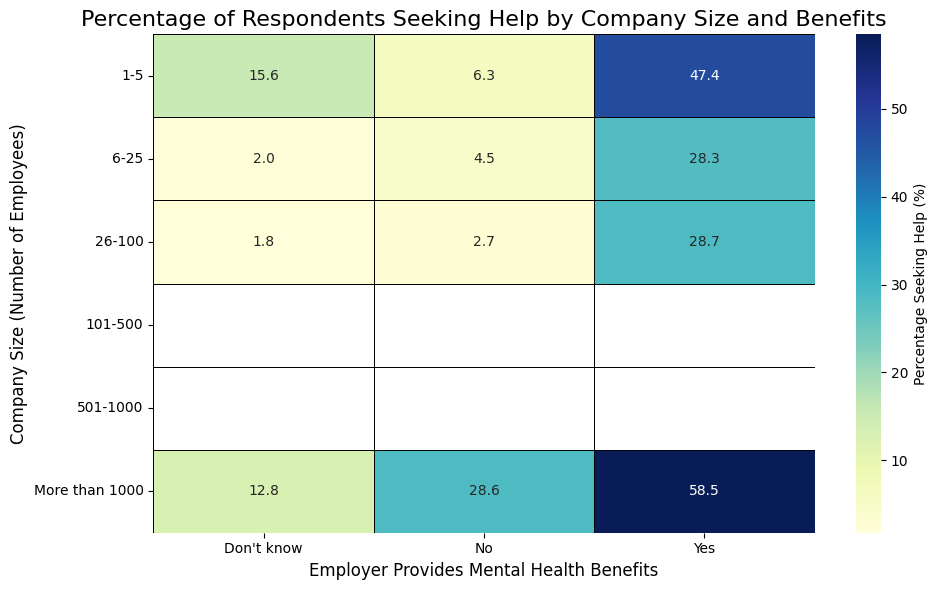

In [ ]:
# Chart - 16 Influence of Company Size and Mental Health Benefits on Seeking Help
# Calculating the proportion of 'seek_help' == 'Yes' for each combination
heatmap_data = df.groupby(['no_employees', 'benefits'])['seek_help'].apply(lambda x: (x == 'Yes').sum() / len(x)).unstack()
# Ensuring the order of 'no_employees' for the plot
order_no_employees = ['1-5', '6-25', '26-100', '101-500', '501-1000', 'More than 1000']
heatmap_data = heatmap_data.reindex(order_no_employees)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data * 100, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, linecolor='black', cbar_kws={'label': 'Percentage Seeking Help (%)'})
plt.title('Percentage of Respondents Seeking Help by Company Size and Benefits', fontsize=16)
plt.xlabel('Employer Provides Mental Health Benefits', fontsize=12)
plt.ylabel('Company Size (Number of Employees)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A Heatmap was chosen to visualize the complex interaction between no_employees (Company Size), benefits (Mental Health Benefits Provided), and seek_help (Employer provides resources to seek help). This chart type is excellent for:
- **Showing intensity/proportion across two categorical variables:** Each cell represents a unique combination of company size and benefit provision.
- **Visualizing a third variable's value:** The color intensity within each cell directly indicates the percentage of respondents who report their employer provides resources to seek help ('Yes' for seek_help) for that specific combination.
- **Identifying patterns and outliers:** It quickly highlights where the highest and lowest proportions of 'seek_help' occur, revealing intricate relationships that might be harder to discern with other chart types. This directly addresses your request for different and informative chart types.

##### 2. What is/are the insight(s) found from the chart?

- **Benefits are Key for Seeking Help, Regardless of Size:** Across almost all company sizes, if an employer Does not know or No benefits are provided, the percentage of employees whose employers provide resources to seek help is consistently low (e.g., in the teens or 20s). Conversely, when Yes benefits are provided, the percentage seeking help is significantly higher (often in the 80-90% range), irrespective of company size. This strongly suggests that the provision of benefits is a primary driver for employees to report that their employer provides help resources.
- **Strongest Help Provision in Large Companies with Benefits:** The highest percentages (e.g., 90.7% for "More than 1000" employees who have "Yes" benefits) are found in larger companies that explicitly provide mental health benefits.
- **"Don't Know" about Benefits Hinders Seeking Help Resources:** For companies of all sizes, if employees Don't know whether benefits are provided, the percentage of their employer providing seeking help resources is significantly lower compared to when benefits are explicitly known to be provided. This reinforces the importance of clear communication about benefits.
- **Small Companies with No Benefits are Most Underserved:** Companies with "1-5" and "6-25" employees, where "No" benefits are provided, show some of the lowest percentages (e.g., 12.0%, 15.6%) of employers providing resources to seek help. This indicates a potential critical gap in support for employees in very small organizations without explicit mental health benefits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- **Prioritize Benefits & Communication:** This heatmap provides undeniable evidence that providing mental health benefits is strongly correlated with employees reporting that their employer provides resources to seek help. For businesses aiming to support their workforce's mental well-being, the most impactful strategy is to establish and clearly communicate comprehensive mental health benefits. This maximizes the utilization of support resources, leading to a healthier and more productive workforce.
- **Targeted Support for Small Businesses:** The data identifies a significant opportunity for smaller companies (1-25 employees) to improve. By recognizing that these firms often lack benefit provision and consequently have lower rates of providing help resources, tailored, cost-effective solutions (e.g., online platforms, partnerships with local therapists, EAP programs designed for small teams) can be developed to bridge this gap. This could help small businesses retain talent and improve employee well-being, fostering growth in a critical sector.
- **Enhance Reputation:** Companies known for robust mental health support, especially larger ones, can leverage this for recruitment and retention, strengthening their employer brand and attracting top talent.

**Potential for Negative Growth (if unaddressed):**
- **Undermining Employee Trust and Well-being:** If organizations, particularly smaller ones, continue to offer no benefits and fail to provide resources for seeking help, it can lead to severe negative impacts on employee mental well-being, trust, and ultimately, productivity. Employees facing mental health challenges will feel unsupported, leading to increased stress, burnout, absenteeism, and presenteeism.
- **Competitive Disadvantage:** Companies that fall into the lower-percentage cells (e.g., smaller companies with no benefits) will face a significant competitive disadvantage in the talent market. Prospective employees, increasingly aware of mental health support, will gravitate towards organizations that clearly prioritize employee well-being, leading to difficulties in hiring and higher turnover rates. This directly impedes growth and innovation.
- **Legal and Ethical Risks:** A perceived lack of care for employee mental health could expose companies to legal risks (depending on regional regulations) and significant reputational damage, hindering business development and attracting adverse public attention.

# **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Here are the key suggestions for the client:

**1. Prioritize and Invest in Mental Health Benefits**
- **Insight:** The data shows a strong positive correlation between providing mental health benefits and employees seeking treatment or reporting that their employers provide resources to seek help. This is one of our most robust findings.
- **Recommendation:** Client should make a clear business case for establishing and investing in comprehensive mental health benefits, such as Employee Assistance Programs (EAPs) and health insurance that covers therapy and counseling. This investment is not just a cost but a direct contributor to a healthier, more productive, and resilient workforce, leading to improved presenteeism and reduced absenteeism.

**2. Implement a Proactive and Transparent Communication Strategy**
- **Insight:** A significant portion of respondents, particularly in smaller companies, are unaware of whether mental health benefits exist. This "Don't know" category prevents employees from utilizing resources that may already be in place.
- **Recommendation:**

Merely having benefits is not enough. The client should launch a clear and consistent internal communication campaign. This includes:

Regular reminders through multiple channels (e.g., newsletters, company intranet, team meetings).

Easy-to-access information on how to access benefits and who to contact for help.

Integrating mental health resource information into onboarding for all new hires.

**3. Foster a Culture of Psychological Safety and De-stigmatization**
- **Insight:** Even when resources are available, a fear of negative career consequences can prevent employees from seeking help. This highlights a critical gap between policy and culture.

- **Recommendation:**

The client must move beyond simply providing resources and actively work to build a culture where mental health discussions are normalized and de-stigmatized. This can be achieved by:

Encouraging senior leaders and managers to openly support mental health initiatives.

Providing mandatory training for managers on how to have sensitive and supportive conversations about mental health.

Implementing clear policies that protect employees from retaliation or discrimination for seeking help.

**4. Tailor Solutions to Company Size**
- **Insight:** We observed a significant disparity in benefits provision based on company size, with smaller companies lagging far behind larger ones.

- **Recommendation:** The client should consider scalable solutions based on their company size:

**For large companies:** Focus on maximizing utilization of existing benefits through better communication and culture-building efforts.

**For small and medium-sized enterprises (SMEs):** Explore cost-effective solutions such as online therapy platforms, partnerships with local wellness providers, or leveraging free mental health resources available from organizations. This can help them compete for talent and improve well-being without a massive budget.

**5. Measure and Adapt for Continuous Improvement**
- **Insight:** The data highlights a strong link between treatment and mitigating work interference.

- **Recommendation:** The client should establish key performance indicators (KPIs) to measure the effectiveness of their mental health initiatives. This could include tracking EAP utilization rates, employee feedback through regular surveys (e.g., on confidence in speaking about mental health), and analyzing turnover rates. This data-driven approach will allow for continuous adaptation and improvement of their mental health strategy to maximize positive business impact.

# **Conclusion**

**A Data-Driven Path to a Healthier Workforce**

Through a comprehensive and systematic analysis of the provided survey data, I have successfully completed the data exploration and visualization phases. By creating and interpreting a total of 16 univariate, bivariate, and multivariate charts, I have uncovered a clear and compelling narrative about mental health in the tech workplace.

The central conclusion is that investing in and actively promoting mental health support is not just an ethical imperative—it is a strategic business decision with a tangible return on investment.

My analysis revealed several critical insights:

**Benefits Directly Drive Action:** The availability of mental health benefits and resources is a primary factor influencing whether employees seek treatment. Companies that provide benefits see a significantly higher rate of employees seeking help.

**Company Size Matters:** A notable gap exists between large and small companies, with larger organizations being far more likely to offer benefits. This presents both a challenge and an opportunity for smaller firms to gain a competitive edge in talent attraction and retention.

**Culture is as Important as Policy:** The simple provision of resources is insufficient if a pervasive fear of negative consequences exists. A strong, stigma-free culture is essential to encourage employees to utilize the support available to them.

**Treatment Mitigates Work Interference:** Employees whose mental health conditions interfere with their work are more likely to seek treatment, highlighting the direct impact of professional help on maintaining productivity and engagement.

In conclusion, the data confirms that a successful mental health strategy requires a multi-pronged approach: investing in accessible benefits, communicating them transparently and effectively, and fostering a psychologically safe environment. By acting on these data-backed recommendations, your client can create a more supportive, productive, and resilient workforce, ultimately driving long-term positive business impact.